<center><font size="10"> 🔥Regression🔥 </font></center>

# 
# 
# 
## Linear Regression

#### Before diving into the crux of Linear Regression and trying through different parameters to reduce cost function lets understand how we can directly arrive to a **minimal cost function** using Linear Algebra

#### The formulae for minimalizing cost function:  $\hat{θ} = (X^T.X)^-1.X^T.y $

#### $ where: $
#### $ \hat{θ} = value\, of\, θ\, that\, minimizes\, the\, cost\, function $
#### $ y = vector\, of\, target\, values\, containing\, y^1 \, to\, y^m $

#### creating a linear looking dummy dataset to check this

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100,1)

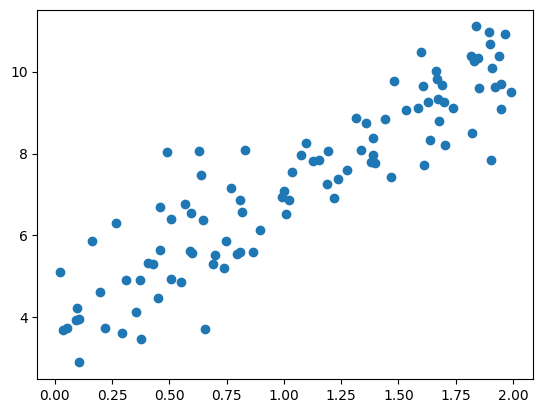

In [4]:
plt.scatter(X, y)

#### now that we have a data lets compute the above equation

In [5]:
X_b = np.c_[np.ones((100,1)), X] 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[3.90278258],
       [3.18131067]])

$\theta_0 = 4.060$
####  
$\theta_1 = 2.966$

In [7]:
X_new = np.array([[0],[2]])

In [8]:
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.90278258],
       [10.26540393]])

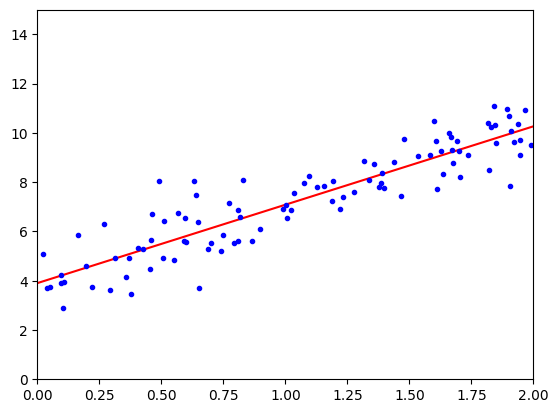

In [9]:
plt.plot(X_new, y_predict,"r-")
plt.plot(X,y,"b. ")
plt.axis([0,2,0,15])
plt.show()

#### To perform all the steps done above we can do this easily with sklearn's LinearRegression

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [12]:
lin_reg.intercept_, lin_reg.coef_

(array([3.90278258]), array([[3.18131067]]))

In [13]:
lin_reg.predict(X_new)


array([[ 3.90278258],
       [10.26540393]])

# Gradient Descent

#### Now optimizing to a optimal solution using above methods are pretty fast and easy when the dataset is small but when the dataset gets very large we need to consider something better. this is where gradient descent comes to play

### We can caluculate Gradient Descent nextstep using:
#
$ θ^{(nextstep)} = θ - η\, ▽_θ\, MSE(θ) $
#### 
where: $η = learning\, rate$ and $▽_θ\, MSE(θ) = {\frac{2}{m}} X^T(Xθ - y) $


## Batch Gradient Descent
# 
#### lets perform Gradient descent on a linear dummy data

In [14]:
eta = 0.1  # eta => η
n_iterations = 1000
m = 100

In [15]:
theta = np.random.randn(2,1)

In [16]:
theta

array([[-1.05509085],
       [-0.3060817 ]])

In [17]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients

In [18]:
theta

array([[3.90278258],
       [3.18131067]])

In [19]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path = None):
    m = len(X_b)
    plt.plot(X, y, "b. ")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

In [20]:
np.random.seed(42)

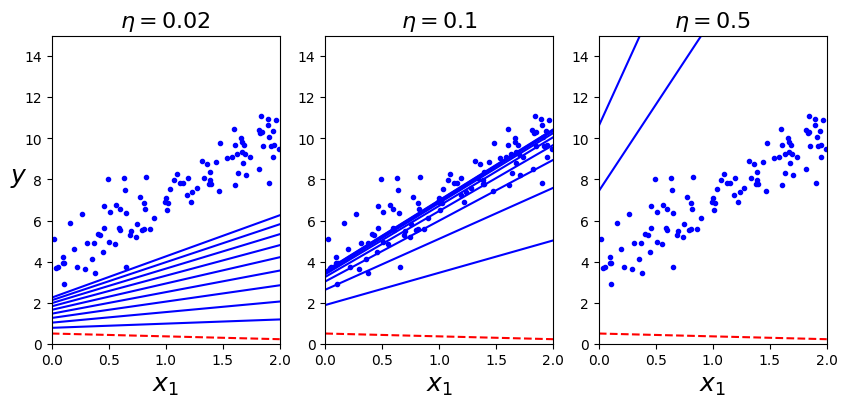

In [21]:
theta = np.random.randn(2,1)
plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

## Stochastic Gradient Descent
#### Stochastic Gradient Descent just picks a **random** instance in the training set at every step and computes the gradients based only on that single instance.
#### Randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum.
#### The function that determines the learning rate at each iteration is called the **learning schedule**.

In [22]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

In [23]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule params

def learning_schedule(t):
    return t0/(t+t1)

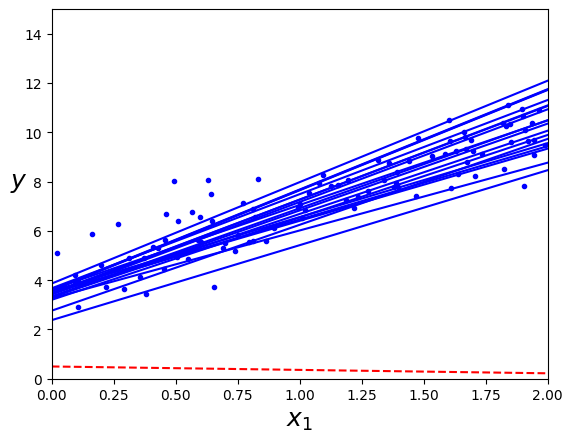

In [24]:
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict= X_new_b.dot(theta)
            style = "b-" if i > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])  
plt.show() 

In [25]:
theta

array([[3.91574671],
       [3.19763067]])

#### Pythonic way of doing the above math heavy code

In [26]:
from sklearn.linear_model import SGDRegressor

In [27]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.91129279]), array([3.25728378]))

## Mini Batch Gradient Descent

In [28]:
mini_sgd_reg = SGDRegressor(alpha=0.0001, learning_rate='constant',max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
mini_sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, learning_rate='constant', penalty=None)

In [29]:
mini_sgd_reg.intercept_, mini_sgd_reg.coef_

(array([3.96662565]), array([2.92467469]))

# Polynomial Regression

In [30]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)


In [32]:
X[0]

array([-0.90665955])

In [33]:
X_poly[0]

array([-0.90665955,  0.82203154])

In [34]:
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y)
lin_reg_poly.intercept_, lin_reg_poly.coef_

(array([2.07200787]), array([[0.98499034, 0.50114886]]))

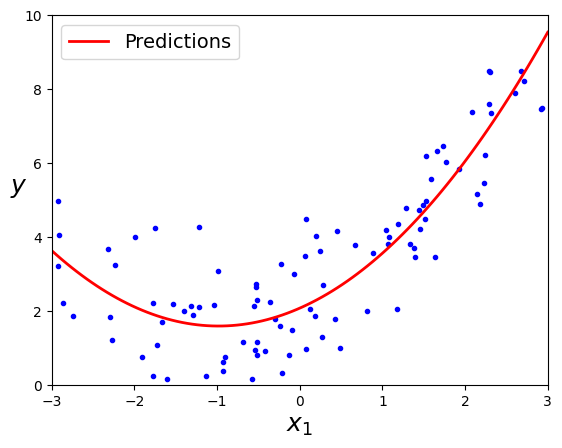

In [35]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg_poly.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

In [36]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=300, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [37]:
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y)
lin_reg_poly.intercept_, lin_reg_poly.coef_

(array([3.2704504]),
 array([[ 2.65430003e-136, -1.01997297e-136,  9.98003906e-137,
          8.40062235e-137, -3.54563654e-137, -6.33603755e-137,
         -2.27295744e-137, -8.82211485e-137,  1.85086208e-140,
          1.99189368e-140, -2.37739247e-140, -1.67998397e-141,
          2.32157745e-140, -1.91000263e-140, -1.67851451e-140,
          1.05104564e-140, -3.92513644e-141, -5.12928762e-142,
         -7.78645152e-141,  5.83732188e-141,  9.90582666e-141,
          2.41716165e-141,  1.97751954e-140, -2.37330337e-141,
          1.05790663e-141, -2.23683981e-141,  1.17725552e-141,
         -7.63437329e-141,  9.78526421e-142, -3.72878038e-141,
          3.92851373e-141, -3.13651201e-141,  1.06480351e-141,
         -2.49587374e-141,  3.97352149e-141, -2.54416602e-141,
          1.44663415e-141, -5.49310694e-141,  3.48235295e-142,
         -2.15166373e-142, -1.38344880e-142,  9.55040756e-142,
          5.72294827e-142,  1.49055978e-141, -6.71950390e-142,
         -1.42538150e-143, -1.8452

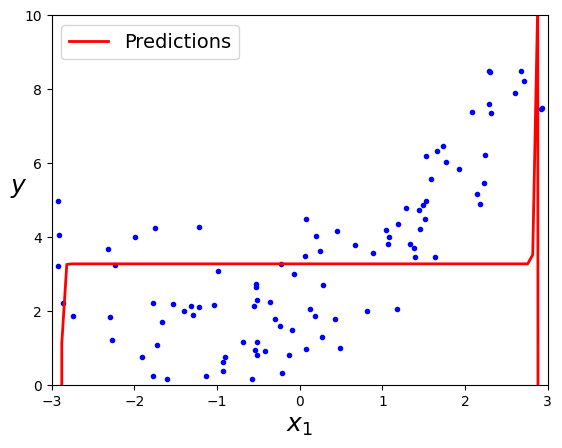

In [38]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg_poly.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

#### while using a higher degree polynomial the model seems to over fit and if using smaller polynamial it seems to underfit

#### so lets try using learning curves to understand how the model fits the data a bit better
#
# Learning Curves

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = 'Train')
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 2, label = 'Val')
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14) 

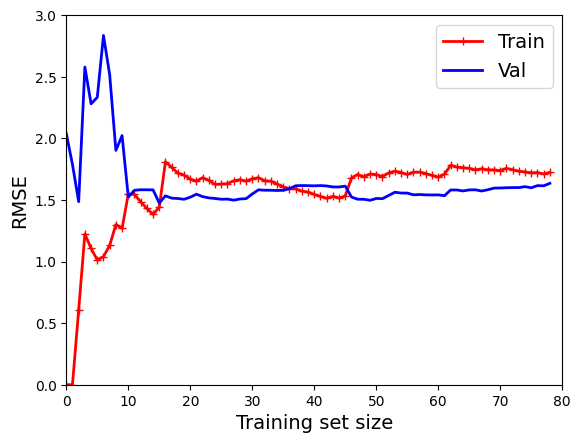

In [40]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

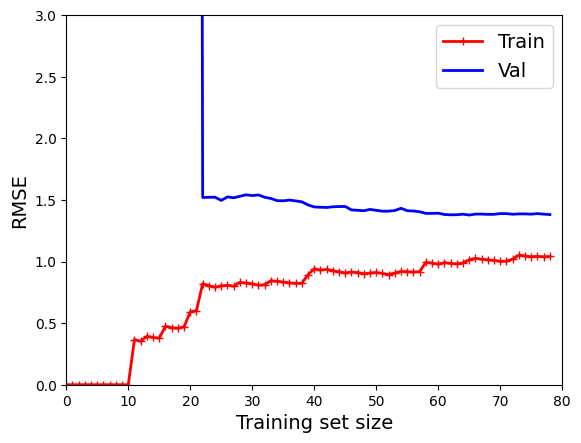

In [41]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
                        ("polyfeatures", PolynomialFeatures(degree = 10, include_bias=False)),
                        ("lin_reg", LinearRegression())
                        ])
plot_learning_curves(polynomial_regression,X,y)
plt.axis([0, 80, 0, 3])
plt.show()

# Ridge Reggression (Tikhonov regularization)
#### It is important to scale the data (e.g., using a StandardScaler) before performing Ridge Regression, as it is sensitive to the scale of the input features. This is true of most regularized models.
#### 
# 
$ \hat{p} = (X^TX + αA)^{-1}\,X^T\,y $

In [42]:
from sklearn.linear_model import Ridge

In [44]:
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.94988156]])

## Using Stochastic Gradient Descent 
#### adding l2 as penalty and target value for a new input feature value of 1.5.

In [45]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X,y)
sgd_reg.predict([[1.5]])

c:\Users\unnikris\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([4.93562312])

<font size="6"> Lasso Regression </font> <font size="3"> (Least Absolute Shrinkage and Selection Operator) </font>

In [46]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.90262757])

# Elastic Net

In [47]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha= 0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.9015262])

In [49]:
lin_reg.fit(X,y)

LinearRegression()

In [50]:
lin_reg.predict([[1.5]])

array([[4.95558998]])

#### As we tried to find the optimum solution using linear regression and regularizing it the results were
<font size="5"> Linear Regression </font> <font size="3"> : 4.95558998 </font>
#### 
<font size="5"> Ridge Regression </font> <font size="3"> (without SGD): 4.94988156 </font>
#### 
<font size="5"> Ridge Regression </font> <font size="3"> (with SGD): 4.93562312 </font>
#### 
<font size="5"> Lasso Regression </font> <font size="3"> : 4.90262757 </font>
#### 
<font size="5"> Elastic Net </font> <font size="3"> : 4.9015262 </font>

#### 🔥  It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features’ weights down to zero.
#### 🔥 Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

# Early Stopping

In [92]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [93]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler



poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, warm_start=True,
                        penalty=None, learning_rate="constant", eta0=0.0005)

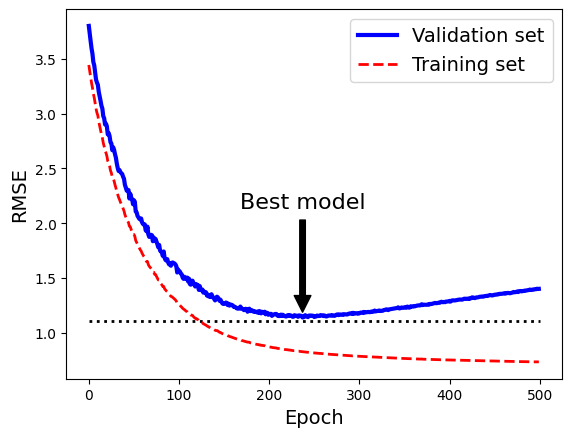

In [94]:
import warnings
from sklearn.exceptions import ConvergenceWarning

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
            xy=(best_epoch, best_val_rmse),
            xytext=(best_epoch, best_val_rmse + 1),
            ha="center",
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()


warnings.filterwarnings('ignore', category=ConvergenceWarning)


## ========================================================================================================================================================================================================

## Logistic Regression

#### Logistic Regression (also called Logit Regression) can be used for classification as well.
# 
#### Logistic Regression model estimated probability (vectorized form): $ hat{p} = h_θ(x) = σ(X^Tθ) $
#### Logistic function: $ σ(t) = {\frac{1}{1 + exp(-t)}} $

#### σ(t) < 0.5 when t < 0, and σ(t) ≥ 0.5 when t ≥ 0, so a Logistic Regression model predicts 1 if $x^Tθ$ is positive, and 0 if it is negative.

In [95]:
from sklearn import datasets
iris = datasets.load_iris()

In [112]:
import pandas as pd
import numpy as np
df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [117]:
X = iris['data'][:,3:]
y = (iris['target'] == 2)

In [118]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

c:\Users\unnikris\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\patches.py:1479: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.verts = np.dot(coords, M) + [


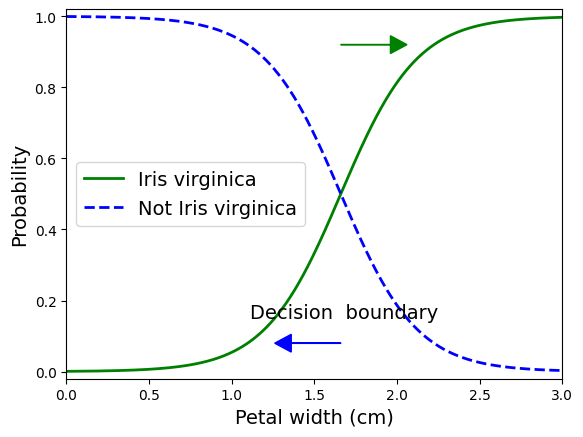

In [122]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [123]:
log_reg.predict([[1.7],[1.5]])

array([ True, False])

# ===================================================================================================================================================================================================

<font size="6"> Softmax Regression </font> <font size="3"> (Multinomial Logistic Regression) </font>

#### Softmax score for class k ==> $s_k(x) = x^Tθ^{(k)}$
# 
#### Softmax function(normalized exponential) ==> $ \hat{p}_k = σ(s(x))_k = {\frac{exp(s_k(x))}{\sum\limits_{j=1}^{K} exp(s_j(x))}} $
#
#### where: K is the number of classes
#### $ s(x) $ is a vector containing the scores of each class for the instance x.
#### $ σ(s(x))_k $ is the estimated probability that the instance x belongs to class k given the scores of each class for that instance.

In [124]:
X = iris['data'][:,(2,3)]
y = iris["target"]

In [127]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C = 10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [128]:
softmax_reg.predict([[5,2]])

array([2])

In [129]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])